21MIS1152
Rajeev Sekar

Loading the dataset

In [17]:
import pandas as pd
cc_apps = pd.read_csv("cc_approvals.data", header = None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


The col names are defined and the summary stats and info of the dataset is displayed

In [18]:
cc_apps.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 
            'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 
            'Citizen', 'ZipCode', 'Income','ApprovalStatus']

# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)
print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)
print('\n')


             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-

DATA PREPROCESSING

Handling null values and 2 cols are dropped as they are irrelavant for this task


In [19]:
import numpy as np

# Drop the features DriversLicense and ZipCode
cc_apps = cc_apps.drop(["DriversLicense", "ZipCode"], axis=1)

#replace all ? with numpy NaN value
cc_apps = cc_apps.replace('?', np.NaN)

#change the datatype of age col to float
cc_apps['Age'] = cc_apps['Age'].astype(float)

#print no of null values 
cc_apps.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

In [20]:
#catagorical variables
categorical = [var for var in cc_apps.columns if cc_apps[var].dtype == 'O']

#numeric variables
numerical = [var for var in cc_apps.columns if cc_apps[var].dtype != 'O']

#replace null values with mode value
for col in categorical:
    cc_apps[col].fillna(cc_apps[col].mode()[0],inplace = True)
    
#handle missing values of numeric features by replacing with mean
cc_apps[numerical] = cc_apps[numerical].fillna(cc_apps[numerical].mean())

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps.isnull().sum())

print(cc_apps["ApprovalStatus"])

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64
0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: ApprovalStatus, Length: 690, dtype: object


Separate feature and target values and spliting into train and test sets

In [25]:
# split data into its X and y components
X = cc_apps.drop('ApprovalStatus',axis = 1)
y = cc_apps['ApprovalStatus']
X=pd.get_dummies(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

MODEL TRAINING: Linear SVM

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

MODEL EVALUATION

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[ 74,  16],
       [ 17, 100]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           +       0.81      0.82      0.82        90
           -       0.86      0.85      0.86       117

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



84% of the cases are accurately predicted, onyl 81% of cases predicted as approved are actually approved and  only 82% of the cases of the cases which are actually approved are predicted correctly

This shows the points considered as the support vectors

In [30]:
print(clf.support_vectors_)

[[36.33   2.125  0.085 ...  1.     0.     0.   ]
 [20.25   9.96   0.    ...  1.     0.     0.   ]
 [21.33  10.5    3.    ...  1.     0.     0.   ]
 ...
 [35.25   3.165  3.75  ...  1.     0.     0.   ]
 [25.67   2.21   4.    ...  1.     0.     0.   ]
 [32.33   7.5    1.585 ...  0.     0.     1.   ]]


In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

Text(0.5, 0, 'Income ')

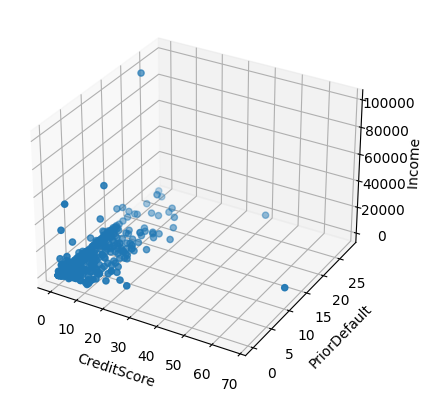

In [35]:
ax = plt.axes(projection='3d')
ax.scatter(X['CreditScore'],X['Debt'], X['Income'])
ax.set_xlabel('CreditScore')
ax.set_ylabel('PriorDefault')
ax.set_zlabel('Income ')